In [8]:
#Import required libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Import input file
df=pd.read_csv("test.csv")

In [15]:
#  Cleaning the data
df['Rent'] = df['Rent'].replace(['-'],'0')
df['Rent']=pd.to_numeric(df['Rent'])
df['MaintenanceCharge'] = df['MaintenanceCharge'].replace(['No'],'0')
df['MaintenanceCharge']=pd.to_numeric(df['MaintenanceCharge'])
df[["Area","Measure"]]= df["Area"].str.split(" ", n = 0, expand = True)
df['Area'] = df['Area'].str.replace(',','')
df['Area']=pd.to_numeric(df['Area'])
df_clean=pd.DataFrame(df[['Place','Area','MaintenanceCharge','Deposit','Rent','Furnished','ApartmentType','TenantType']])

In [17]:
df_clean.dtypes

Place                object
Area                  int64
MaintenanceCharge     int64
Deposit               int64
Rent                  int64
Furnished            object
ApartmentType        object
TenantType           object
dtype: object

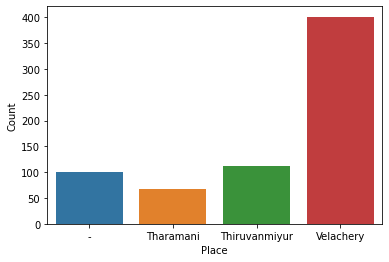

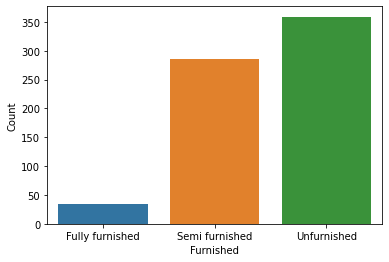

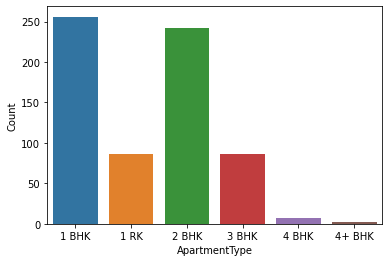

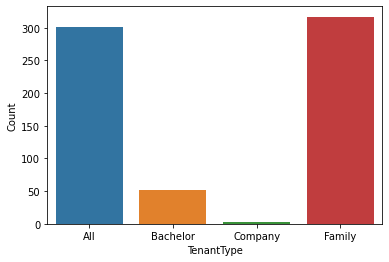

In [25]:
# Visulaise the Categorical column
for i in df_clean.columns:
        if df_clean[i].dtype == object:
            df_group = df_clean.groupby(i).agg({'Area':'count'}).rename(columns = {'Area':'Count'}).reset_index()
            sns.barplot(data=df_group, x=i,y ='Count' )
            plt.show()
    

In [29]:
fn=pd.DataFrame({'Column Names':df_clean.columns}).set_index('Column Names')
dv = 'Rent'
col_list=df_clean.columns
fn['Corr']=[df_clean[dv].corr(df_clean[i]) if df_clean[i].dtype=='int64' and i!= dv else ("Dependent Variable" if i == dv else np.nan) for i in col_list]
fn = fn.reset_index()
fn

,Column Names,Corr
0,Place,NaN
1,Area,0.498407
2,MaintenanceCharge,0.794809
3,Deposit,0.193745
4,Rent,Dependent Variable
5,Furnished,NaN
6,ApartmentType,NaN
7,TenantType,NaN


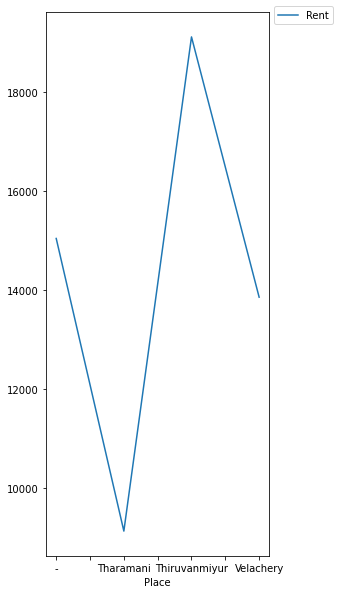

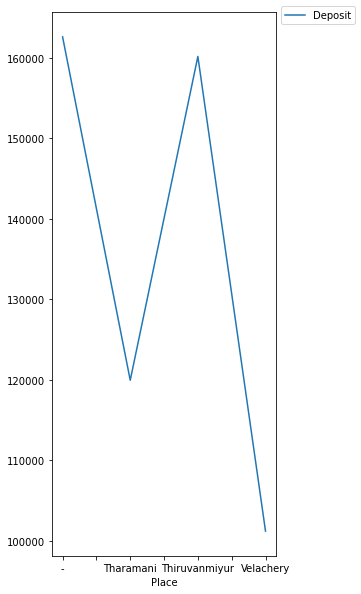

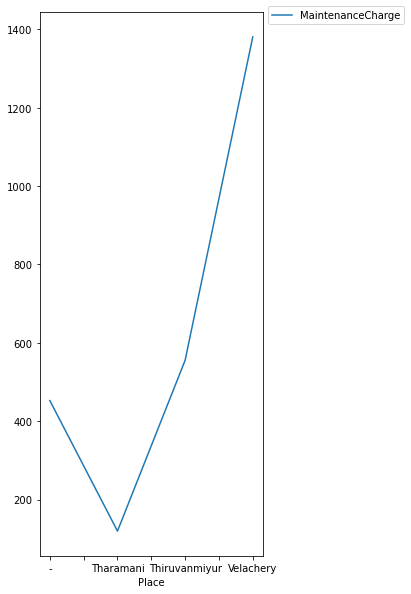

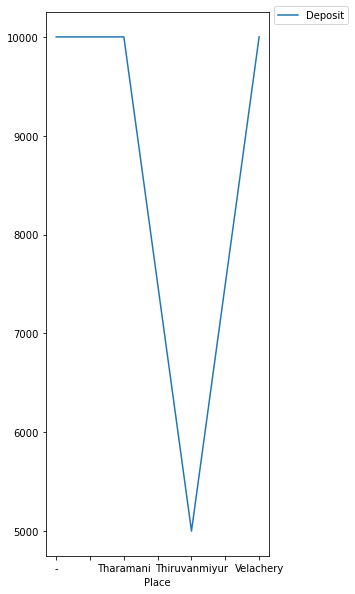

In [81]:

# Groupby multiple columnsdf
dfR=dff[['Place','Rent']]
result = dfR.groupby(['Place']).mean()
ax = result.plot(figsize=(4,10))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

dfD=dff[['Place','Deposit']]
result1 = dfD.groupby(['Place']).mean()
ax1 = result1.plot(figsize=(4,10))
ax1.legend(bbox_to_anchor=(1, 1.02), loc='upper left')


dfM=dff[['Place','MaintenanceCharge']]
result2 = dfM.groupby(['Place']).mean()
ax2 = result2.plot(figsize=(4,10))
ax2.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

dfp=dff[['Place','Deposit']]
result3 = dfp.groupby(['Place']).min()
ax = result3.plot(figsize=(4,10))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')


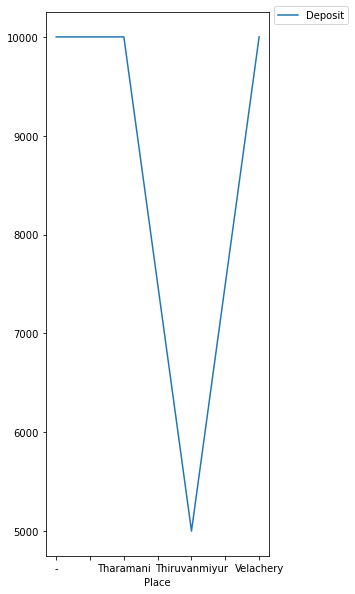

In [72]:
dfp=dff[['Place','Area']]
result3 = dfp.groupby(['Place']).min()
ax = result3.plot(figsize=(4,10))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')